In [30]:
import sys
sys.path.append("../")
from mir.common import RepertoireDataset, VDJtoolsParser
from mir.basic import FrequencyTable, DiversityIndices, RarefactionCurve
import pandas as pd
from plotnine import *

Load metadata

In [2]:
metadata = pd.read_table('assets/samples/aging_3year/metadata.txt', sep='\t')
metadata

,file_name,donor,age
0,A6-I200ob.txt.gz,donor1,27
1,A6-I201ob.txt.gz,donor1,30
2,A6-I202ob.txt.gz,donor2,47
3,A5-S23.txt.gz,donor2,50


Load four repertoires for two donors taken 3 years apart

In [3]:
dataset = RepertoireDataset.load(parser=VDJtoolsParser(), 
                                 metadata=metadata,
                                 paths=['assets/samples/aging_3year/' + r['file_name'] 
                                        for _, r in metadata.iterrows()])
print(dataset)

          file_name   donor  age                                         path
0  A6-I200ob.txt.gz  donor1   27  assets/samples/aging_3year/A6-I200ob.txt.gz
1  A6-I201ob.txt.gz  donor1   30  assets/samples/aging_3year/A6-I201ob.txt.gz
2  A6-I202ob.txt.gz  donor2   47  assets/samples/aging_3year/A6-I202ob.txt.gz
3     A5-S23.txt.gz  donor2   50     assets/samples/aging_3year/A5-S23.txt.gz


Compute clonotype frequency tables

In [4]:
freq_table = FrequencyTable.from_repertoire(dataset[0])
print(freq_table)
print(DiversityIndices(freq_table))
print(RarefactionCurve(freq_table))

Frequency table of 1812062 species and 6943910 individuals:
s1=1030393
s2=410225
s3=173924
s4+=197520

Diversity indices for 1812062 species and 6943910 individuals:
Obs=1812062
OPM=260957.01125158594
H=10.677371582051762
Hpielou=0.7409708104914129
Chao=3106116.6606602212
Hill=[HillCurvePoint(q=0.005, H_q=1804090.0335481064), HillCurvePoint(q=0.01, H_q=1796093.3749716312), HillCurvePoint(q=0.05, H_q=1731216.9306170254), HillCurvePoint(q=0.1, H_q=1647795.8170080348), HillCurvePoint(q=0.5, H_q=878587.9503284262), HillCurvePoint(q=1.0, H_q=43363.42323100516), HillCurvePoint(q=2.0, H_q=123.75006479012457), HillCurvePoint(q=10.0, H_q=21.666522972644113), HillCurvePoint(q=20.0, H_q=18.447124070772265), HillCurvePoint(q=100.0, H_q=16.397652985197453), HillCurvePoint(q=200.0, H_q=16.16878033347137)]
Rarefaction curve=[RarefactionPoint(count_star=0, species=0.0, var_species=0.0, interp=True), RarefactionPoint(count_star=100, species=84.27660320857154, var_species=8.167159430532298, interp=True)

Diversity index table

In [5]:
DiversityIndices.for_dataset(dataset)

,file_name,donor,age,path,depth,obs,opm,shannon,pielou,chao
0,A6-I200ob.txt.gz,donor1,27,assets/samples/aging_3year/A6-I200ob.txt.gz,6943910,1812062,260957.011252,10.677372,0.740971,3.106117e+06
1,A6-I201ob.txt.gz,donor1,30,assets/samples/aging_3year/A6-I201ob.txt.gz,1526650,758985,497157.174205,11.596713,0.856495,2.435931e+06
2,A6-I202ob.txt.gz,donor2,47,assets/samples/aging_3year/A6-I202ob.txt.gz,5927514,954170,160973.048735,9.005132,0.654034,1.615412e+06
3,A5-S23.txt.gz,donor2,50,assets/samples/aging_3year/A5-S23.txt.gz,517858,137624,265756.249783,7.579462,0.640575,5.310692e+05


Hill curve plot

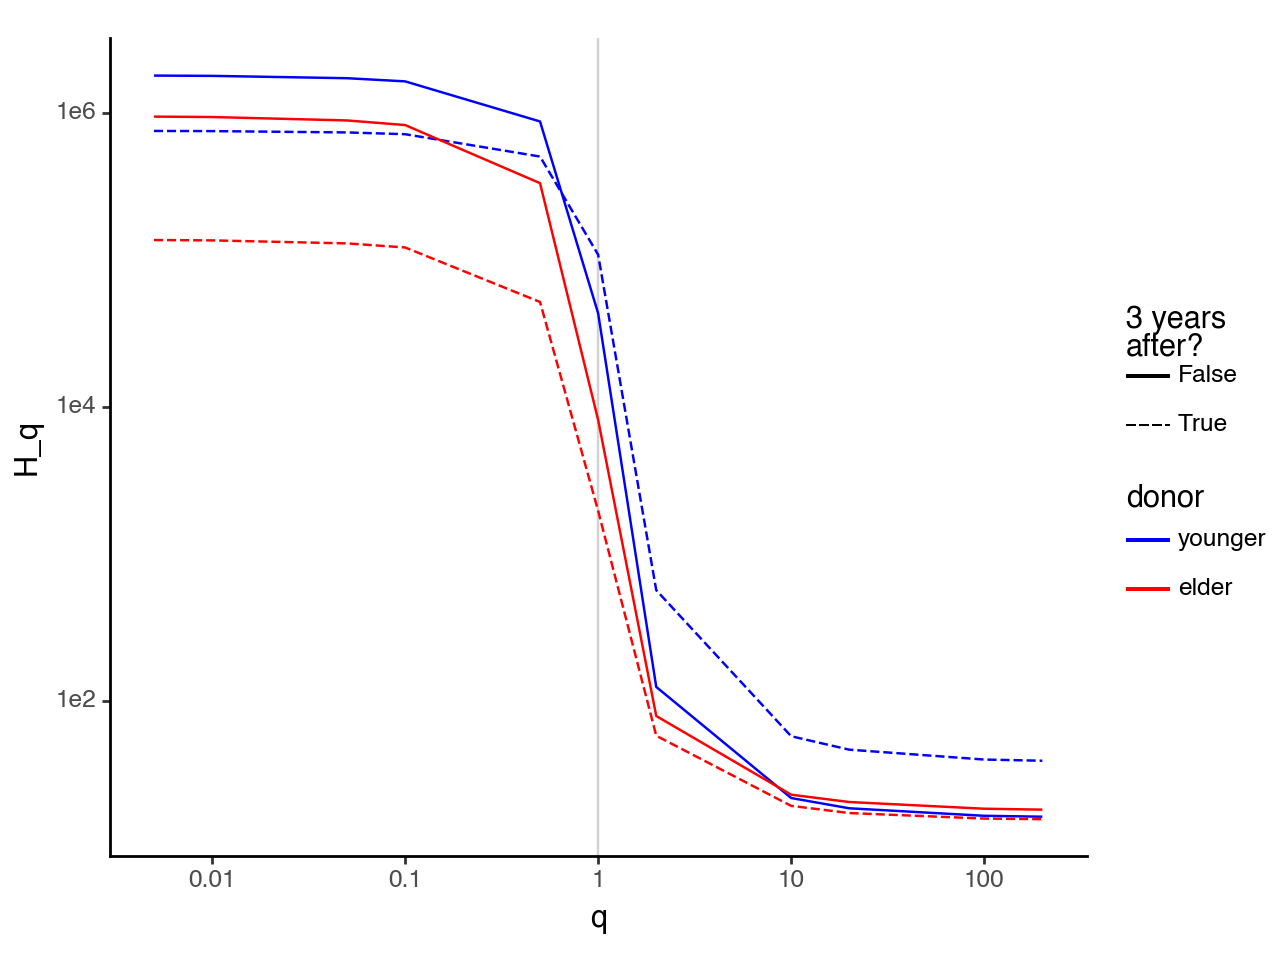

In [34]:
df_hc = DiversityIndices.hill_curve_for_dataset(dataset)
df_hc['agex'] = df_hc['age'].apply(lambda x: x not in {27, 47})
plt = (ggplot(df_hc, aes(x='q', y='H_q', 
                         color='donor', linetype='agex')) + 
       geom_vline(xintercept = 1., color = 'lightgrey') +
       geom_line() + 
       scale_linetype_discrete(name='3 years\nafter?') +
       scale_x_log10(name='q') +
       scale_y_log10(name='H_q') +
       scale_color_manual(values = ['blue', 'red'],
                          labels = ['younger', 'elder']) +
       theme_classic())
print(plt) 

Rarefaction curve